##  Time Series Forcasting 


# Price Trend

In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
df_price=pd.read_csv("/Users/asifsiraz/Desktop/price.csv")

In [3]:
df_price

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,397405,Highland Township,Gettysburg,Adams,PA,13127,1280.0,1280.0,1284.0,1284.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,398292,Town of Wrightstown,Green Bay,Brown,WI,13128,639.0,650.0,668.0,694.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,398343,Urbana,Corning,Steuben,NY,13129,1433.0,1431.0,1437.0,1458.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,398839,Angels,NaN,Calaveras,CA,13130,1516.0,1529.0,1529.0,1515.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563


In [4]:
df_price.columns

Index(['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank',
       'November 2010', 'December 2010', 'January 2011', 'February 2011',
       'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011',
       'August 2011', 'September 2011', 'October 2011', 'November 2011',
       'December 2011', 'January 2012', 'February 2012', 'March 2012',
       'April 2012', 'May 2012', 'June 2012', 'July 2012', 'August 2012',
       'September 2012', 'October 2012', 'November 2012', 'December 2012',
       'January 2013', 'February 2013', 'March 2013', 'April 2013', 'May 2013',
       'June 2013', 'July 2013', 'August 2013', 'September 2013',
       'October 2013', 'November 2013', 'December 2013', 'January 2014',
       'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014',
       'July 2014', 'August 2014', 'September 2014', 'October 2014',
       'November 2014', 'December 2014', 'January 2015', 'February 2015',
       'March 2015', 'April 2015', 'May 2015',

In [5]:
df_price.shape


(13131, 81)

In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13131 entries, 0 to 13130
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Code        13131 non-null  int64  
 1   City             13131 non-null  object 
 2   Metro            11899 non-null  object 
 3   County           13131 non-null  object 
 4   State            13131 non-null  object 
 5   Population Rank  13131 non-null  int64  
 6   November 2010    11348 non-null  float64
 7   December 2010    11348 non-null  float64
 8   January 2011     11348 non-null  float64
 9   February 2011    11500 non-null  float64
 10  March 2011       11673 non-null  float64
 11  April 2011       11722 non-null  float64
 12  May 2011         11732 non-null  float64
 13  June 2011        11732 non-null  float64
 14  July 2011        11732 non-null  float64
 15  August 2011      11732 non-null  float64
 16  September 2011   11734 non-null  float64
 17  October 2011

In [7]:
df_price_Months=df_price.drop(['City Code','City', 'County', 'State', 'Population Rank'],axis=1)

In [8]:
df_price_Months

,Metro,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,Los Angeles,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,Chicago,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,Houston,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,Philadelphia,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,Gettysburg,1280.0,1280.0,1284.0,1284.0,1289.0,1291.0,1293.0,1285.0,1279.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,Green Bay,639.0,650.0,668.0,694.0,725.0,753.0,767.0,803.0,849.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,Corning,1433.0,1431.0,1437.0,1458.0,1464.0,1470.0,1470.0,1480.0,1491.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,NaN,1516.0,1529.0,1529.0,1515.0,1512.0,1502.0,1498.0,1492.0,1477.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563


In [9]:
df_price_Months = df_price_Months.fillna(0)

In [10]:
df_price_Months 

,Metro,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,Los Angeles,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,Chicago,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,Houston,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,Philadelphia,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,Gettysburg,1280.0,1280.0,1284.0,1284.0,1289.0,1291.0,1293.0,1285.0,1279.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,Green Bay,639.0,650.0,668.0,694.0,725.0,753.0,767.0,803.0,849.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,Corning,1433.0,1431.0,1437.0,1458.0,1464.0,1470.0,1470.0,1480.0,1491.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,0,1516.0,1529.0,1529.0,1515.0,1512.0,1502.0,1498.0,1492.0,1477.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563


In [11]:
df_price_Months=df_price_Months .drop('Metro',axis=1)

In [12]:
df_price_Months

,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,1280.0,1280.0,1284.0,1284.0,1289.0,1291.0,1293.0,1285.0,1279.0,1261.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,639.0,650.0,668.0,694.0,725.0,753.0,767.0,803.0,849.0,894.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,1433.0,1431.0,1437.0,1458.0,1464.0,1470.0,1470.0,1480.0,1491.0,1502.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,1516.0,1529.0,1529.0,1515.0,1512.0,1502.0,1498.0,1492.0,1477.0,1467.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563


In [13]:
import pandas as pd

# Assuming you have the DataFrame 'df_price_Months' after dropping unnecessary columns

# Find the column name with the highest value for each row
highest_value_column = df_price_Months.idxmax(axis=1)

# Find the highest value for each row
highest_values = df_price_Months.max(axis=1)

# Combine the results into a new DataFrame
highest_values_df = pd.DataFrame({'Highest Value': highest_values, 'Highest Value Column': highest_value_column})

# Display the rows with the highest value and their corresponding column names
highest_values_df




,Highest Value,Highest Value Column
0,2345.0,June 2016
1,2753.0,January 2017
2,1687.0,June 2016
3,1446.0,May 2016
4,1223.0,August 2016
...,...,...
13126,1442.0,April 2016
13127,1236.0,July 2015
13128,1629.0,April 2013
13129,1563.0,January 2017


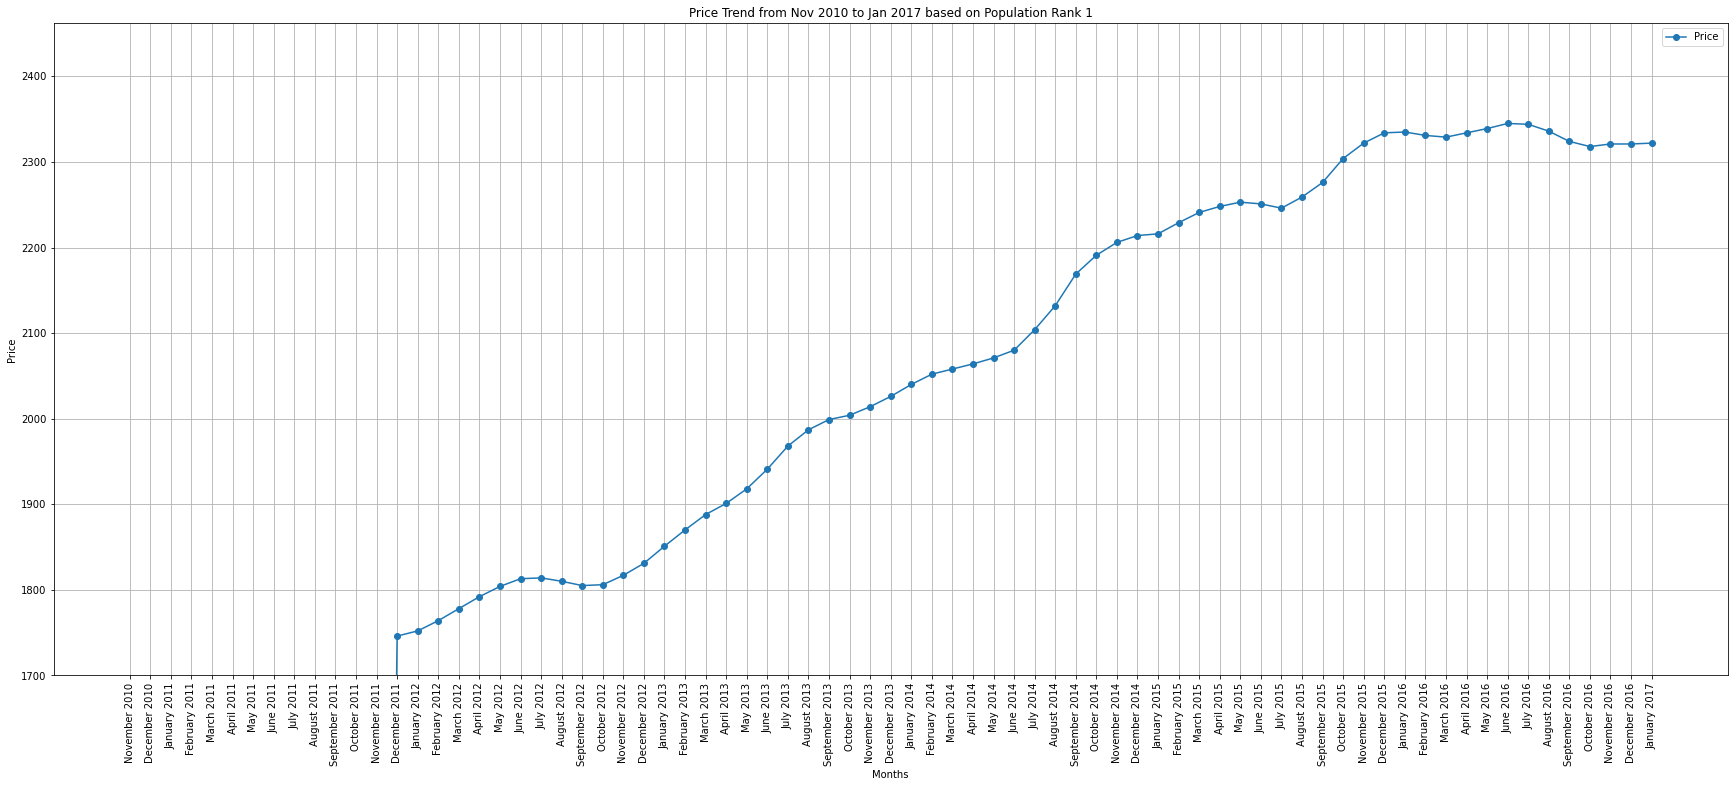

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df_transposed = df_price_Months.T


plt.figure(figsize=(30, 12))
plt.plot(df_transposed.index,df_transposed.iloc[:, 0], marker='o', label='Price')
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Price Trend from Nov 2010 to Jan 2017 based on Population Rank 1')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()


plt.ylim(1700)

plt.show()


In [15]:
# Assuming you have the DataFrame 'df_price_Months' after dropping unnecessary columns

# Find the column name with the highest value for each row
highest_value_column = df_price_Months.idxmax(axis=0)

# Find the highest value for each row
highest_values = df_price_Months.max(axis=0)

# Combine the results into a new DataFrame
highest_values_df = pd.DataFrame({'Highest Value': highest_values, 'Highest Value Column': highest_value_column})

# Display the rows with the highest value and their corresponding column names
highest_values_df


,Highest Value,Highest Value Column
November 2010,18787.0,12234
December 2010,18848.0,12234
January 2011,19054.0,12234
February 2011,19019.0,12234
March 2011,18997.0,12234
...,...,...
September 2016,20615.0,12234
October 2016,20163.0,12234
November 2016,19460.0,12234
December 2016,18605.0,12234


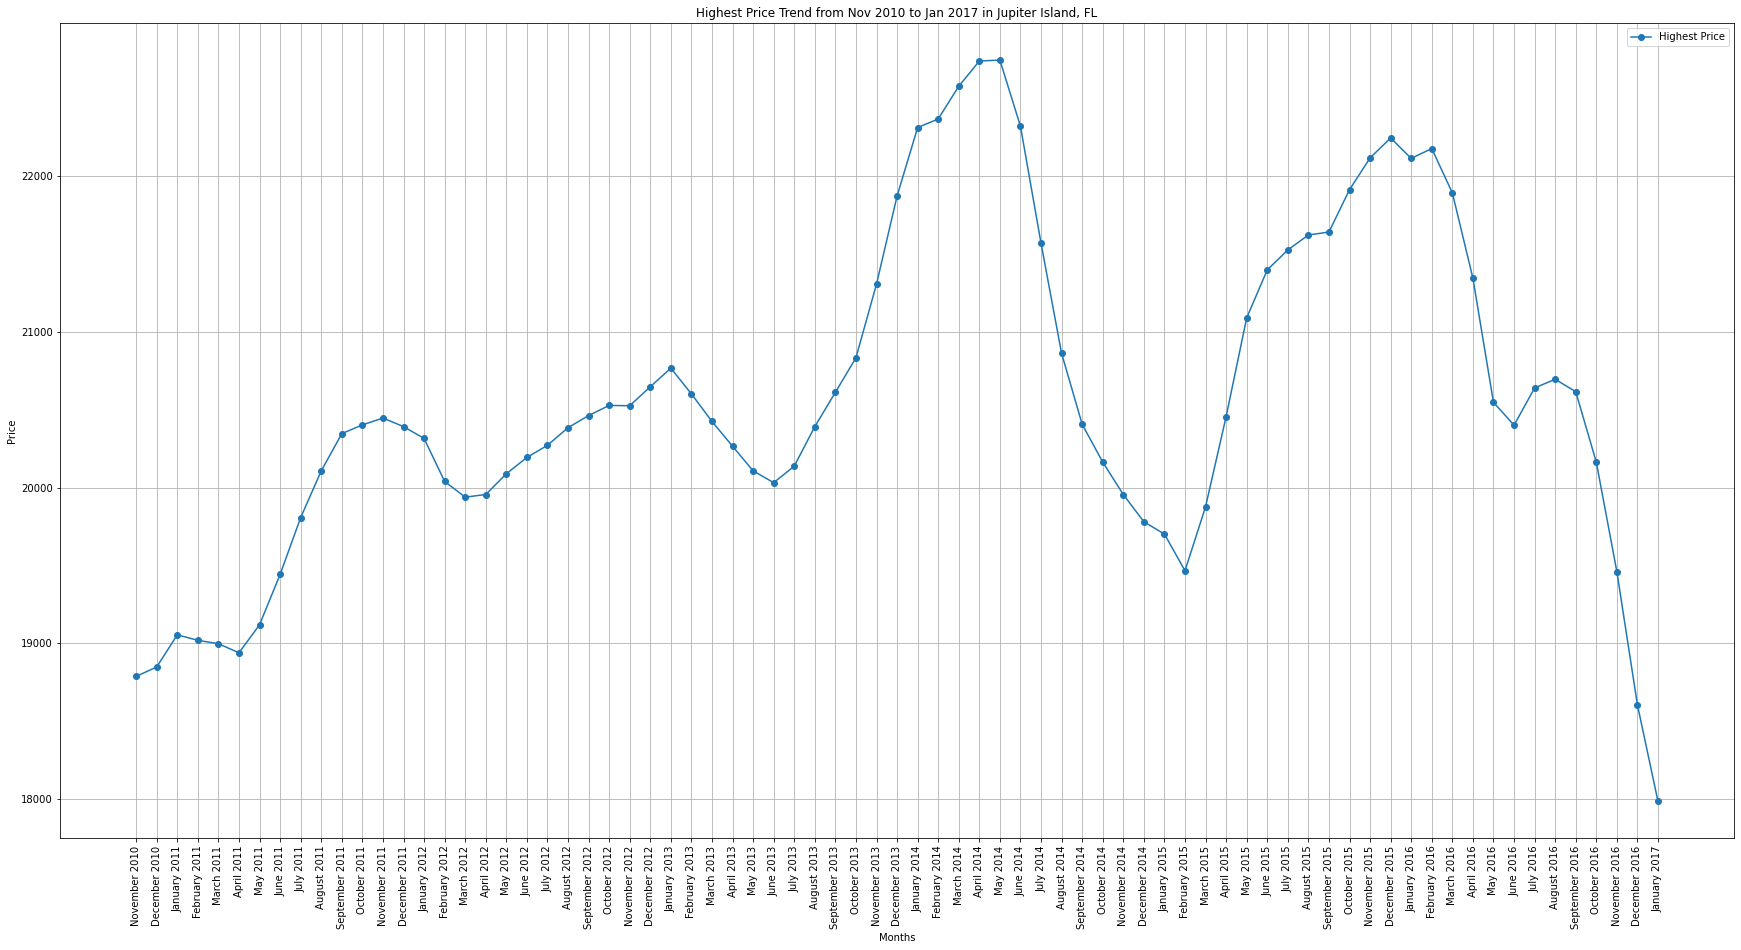

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


highest_values = df_price_Months.max(axis=0)

# Plot only the highest values
plt.figure(figsize=(30, 15))
plt.plot(highest_values.index, highest_values.values,marker="o" ,label='Highest Price')
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Highest Price Trend from Nov 2010 to Jan 2017 in Jupiter Island, FL')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()


plt.show()


In [17]:
df=df_price.loc[12234,['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank']]

In [18]:
df

City Code                  124901
City               Jupiter Island
Metro              Port St. Lucie
County                     Martin
State                          FL
Population Rank             12235
Name: 12234, dtype: object

Jupiter Island, FL has the Highest price trend from Nov 2010 to jan 2017 then rest of all cities

In [19]:
df_price.drop('City Code',axis=1).describe()

,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,13131.000000,11348.000000,11348.000000,11348.000000,11500.000000,11673.000000,11722.000000,11732.000000,11732.000000,11732.000000,...,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,6566.000000,1327.100458,1331.831953,1334.447744,1331.935217,1327.595819,1323.824518,1321.730822,1321.872826,1321.701500,...,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636,1467.296550
std,3790.737527,652.531343,655.822002,653.931315,647.853483,640.168818,636.392831,633.675563,631.981504,629.807342,...,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626,820.707579
min,1.000000,547.000000,539.000000,536.000000,542.000000,535.000000,533.000000,533.000000,536.000000,539.000000,...,543.000000,548.000000,547.000000,544.000000,539.000000,532.000000,527.000000,518.000000,517.000000,518.000000
25%,3283.500000,982.000000,984.750000,986.000000,984.000000,979.000000,973.000000,971.000000,972.000000,974.000000,...,1041.000000,1044.000000,1046.000000,1043.500000,1038.000000,1034.000000,1032.000000,1033.000000,1034.000000,1035.000000
50%,6566.000000,1195.000000,1199.000000,1201.500000,1201.000000,1201.000000,1196.000000,1194.000000,1193.000000,1193.000000,...,1275.000000,1277.000000,1278.000000,1276.000000,1270.000000,1268.000000,1266.000000,1267.000000,1267.000000,1264.000000
75%,9848.500000,1479.000000,1479.000000,1479.000000,1477.000000,1473.000000,1471.000000,1472.000000,1473.000000,1473.000000,...,1625.000000,1630.000000,1633.000000,1629.000000,1628.000000,1628.000000,1630.500000,1630.000000,1632.000000,1634.000000
max,13131.000000,18787.000000,18848.000000,19054.000000,19019.000000,18997.000000,18939.000000,19119.000000,19442.000000,19807.000000,...,21344.000000,20547.000000,20400.000000,20639.000000,20695.000000,20615.000000,20163.000000,19460.000000,18605.000000,17985.000000


In [20]:
df_price.drop('City Code',axis=1).corr()

,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
Population Rank,1.000000,-0.132514,-0.131381,-0.131478,-0.132228,-0.134331,-0.136447,-0.137559,-0.137459,-0.136636,...,-0.154609,-0.155275,-0.155500,-0.155634,-0.156013,-0.156815,-0.157910,-0.159286,-0.160821,-0.161823
November 2010,-0.132514,1.000000,0.999447,0.997959,0.995312,0.991574,0.988236,0.985389,0.983261,0.981877,...,0.963457,0.963019,0.962772,0.962713,0.962693,0.962381,0.961740,0.960715,0.959992,0.959386
December 2010,-0.131381,0.999447,1.000000,0.999257,0.997093,0.993540,0.990269,0.987442,0.985325,0.983908,...,0.965590,0.965105,0.964795,0.964663,0.964575,0.964205,0.963545,0.962636,0.961907,0.961325
January 2011,-0.131478,0.997959,0.999257,1.000000,0.999148,0.996613,0.993797,0.991208,0.989179,0.987726,...,0.966776,0.966301,0.966001,0.965899,0.965837,0.965491,0.964848,0.964069,0.963322,0.962688
February 2011,-0.132228,0.995312,0.997093,0.999148,1.000000,0.999048,0.997152,0.995033,0.993206,0.991749,...,0.967926,0.967408,0.967050,0.966897,0.966795,0.966448,0.965850,0.965296,0.964674,0.964112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
September 2016,-0.156815,0.962381,0.964205,0.965491,0.966448,0.967293,0.967802,0.967810,0.967872,0.968342,...,0.996960,0.997971,0.998721,0.999334,0.999813,1.000000,0.999822,0.999338,0.998611,0.997737
October 2016,-0.157910,0.961740,0.963545,0.964848,0.965850,0.966715,0.967215,0.967184,0.967209,0.967664,...,0.996336,0.997347,0.998070,0.998700,0.999343,0.999822,1.000000,0.999801,0.999243,0.998416
November 2016,-0.159286,0.960715,0.962636,0.964069,0.965296,0.966286,0.966825,0.966779,0.966754,0.967148,...,0.995807,0.996809,0.997473,0.998042,0.998709,0.999338,0.999801,1.000000,0.999780,0.999176
December 2016,-0.160821,0.959992,0.961907,0.963322,0.964674,0.965705,0.966247,0.966172,0.966101,0.966451,...,0.995201,0.996211,0.996829,0.997326,0.997956,0.998611,0.999243,0.999780,1.000000,0.999774


## check for stationarity

In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'df_price_Months' is your DataFrame containing the time series data

def ad_test_dataframe(dataframe):
    for column_name in dataframe.columns:
        print(f"Column: {column_name}")
        column_data = dataframe[column_name].values
        dftest = adfuller(column_data, autolag='AIC')
        print("1. ADF:", dftest[0])
        print("2. P-Value:", dftest[1])
        print("3. Number of Lags:", dftest[2])
        print("4. Number of Observations Used for ADF:", dftest[3])
        print("5. Critical Values:")
        for key, value in dftest[4].items():
            print(f"   {key}: {value}")
        print("\n")

# Call the function with the entire DataFrame 'df_price_Months'
ad_test_dataframe(df_price_Months)


Column: November 2010
1. ADF: -14.321575781284595
2. P-Value: 1.138902603347335e-26
3. Number of Lags: 37
4. Number of Observations Used for ADF: 13093
5. Critical Values:
   1%: -3.4308495480426546
   5%: -2.8617607762630777
   10%: -2.566887514285658


Column: December 2010
1. ADF: -14.349835961408687
2. P-Value: 1.026171586773691e-26
3. Number of Lags: 37
4. Number of Observations Used for ADF: 13093
5. Critical Values:
   1%: -3.4308495480426546
   5%: -2.8617607762630777
   10%: -2.566887514285658


Column: January 2011
1. ADF: -14.34177596581465
2. P-Value: 1.0570741572017864e-26
3. Number of Lags: 37
4. Number of Observations Used for ADF: 13093
5. Critical Values:
   1%: -3.4308495480426546
   5%: -2.8617607762630777
   10%: -2.566887514285658


Column: February 2011
1. ADF: -14.147777565905761
2. P-Value: 2.1887637150635072e-26
3. Number of Lags: 37
4. Number of Observations Used for ADF: 13093
5. Critical Values:
   1%: -3.4308495480426546
   5%: -2.8617607762630777
   10%: -

 From the results the data set is stationary as ADF is negative and P-values is  "0"

In [22]:
!pip install --upgrade pip


In [23]:
!pip install --upgrade pmdarima

In [24]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [25]:
import pandas as pd
from pmdarima import auto_arima
import warnings


column_name = 'December 2010' 
column_data = df_price_Months[column_name].values

warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(column_data, trace=True, suppress_warnings=True)


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=220381.968, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=216534.117, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=220379.968, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=215019.741, Time=0.87 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=214205.016, Time=1.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=213646.504, Time=1.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=213335.004, Time=1.69 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=20.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.53 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=213333.004, Time=0.73 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=213644.504, Time=0.60 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=8.78 sec
 ARIMA(4,1,1)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                13131
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -106660.502
Date:                Sat, 29 Jul 2023   AIC                         213333.004
Time:                        22:56:04   BIC                         213377.900
Sample:                             0   HQIC                        213347.997
                              - 13131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8334      0.006   -137.206      0.000      -0.845      -0.822
ar.L2         -0.6576      0.008    -86.518      0.000      -0.673      -0.643
ar.L3         -0.4909      0.008    -62.240      0.000      -0.506      -0.475
ar.L4         -0.3277      0.008    -43.243      0.000      -0.343      -0.313
ar.L5         -0.1536      0.006    -25.275      0.000      -0.166      -0.142
sigma2      6.659e+05   1915.739    347.588      0.000    6.62e+05     6.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   8.14   Jarque-Bera (JB):            715618.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             2.81
Prob(H) (two-sided):                  0.82   Kurtosis:                        38.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

combined_time_series = df_price_Months.mean(axis=1)
Train = combined_time_series.iloc[2626:]
Test = combined_time_series.iloc[:2626]

# Fit the ARIMA model on the Train dataset
model = ARIMA(Train, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10505
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -84601.386
Date:                Sat, 29 Jul 2023   AIC                         169214.771
Time:                        22:59:30   BIC                         169258.328
Sample:                             0   HQIC                        169229.479
                              - 10505                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8215      0.005   -161.231      0.000      -0.832      -0.812
ar.L2         -0.6678      0.007    -98.763      0.000      -0.681      -0.655
ar.L3         -0.5001      0.007    -69.807      0.0

In [31]:
Train=combined_time_series.loc[2626:]

In [32]:
Test=combined_time_series.loc[:2626]

In [34]:
Train.shape

(10505,)

In [35]:
Test.shape

(2627,)

In [33]:
import pandas as pd
from pmdarima import auto_arima
import warnings

# Assuming you have the combined time series 'combined_time_series'

warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(combined_time_series, trace=True, suppress_warnings=True)

stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=218109.008, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=214446.398, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=218107.008, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=212866.822, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=212060.040, Time=1.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=211471.479, Time=1.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=211144.365, Time=1.72 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.63 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=211142.365, Time=0.74 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=211469.479, Time=0.59 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=9.51 sec
 ARIMA(4,1,1)(0,0,0)[0]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                13131
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -105565.182
Date:                Sat, 29 Jul 2023   AIC                         211142.365
Time:                        23:00:54   BIC                         211187.260
Sample:                             0   HQIC                        211157.358
                              - 13131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8264      0.005   -169.561      0.000      -0.836      -0.817
ar.L2         -0.6655      0.006   -105.191      0.000      -0.678      -0.653
ar.L3         -0.4949      0.007    -73.536      0.000      -0.508      -0.482
ar.L4         -0.3345      0.006    -53.106      0.000      -0.347      -0.322
ar.L5         -0.1573      0.005    -30.717      0.000      -0.167      -0.147
sigma2      5.637e+05   1197.546    470.709      0.000    5.61e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   7.62   Jarque-Bera (JB):           2420674.66
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             4.86
Prob(H) (two-sided):                  0.93   Kurtosis:                        68.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A lower AIC value suggests a better fit "ARIMA(5,1,0)(0,0,0)[0]             : AIC=211142.365, Time=0.91 sec
Total fit time: 76.548 seconds" and seasonality is "zero" (0,0,0).

In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

Train_df=df_price_Months['December 2010'].loc[2626:]
Test_df=df_price_Months['December 2010'].loc[:2626]
# Fit the ARIMA model on the Train dataset
model = ARIMA(Train_df, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          December 2010   No. Observations:                10505
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -85460.070
Date:                Sat, 29 Jul 2023   AIC                         170932.140
Time:                        23:15:05   BIC                         170975.697
Sample:                             0   HQIC                        170946.848
                              - 10505                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8296      0.006   -128.254      0.000      -0.842      -0.817
ar.L2         -0.6607      0.008    -80.757      0.000      -0.677      -0.645
ar.L3         -0.5001      0.008    -59.402      0.0

In [77]:
Train_df=df_price_Months['December 2010'].loc[:2626]

In [78]:
Test_df=df_price_Months['December 2010'].loc[2626:]

In [79]:
Train_df.shape

(2627,)

In [80]:
Test_df.shape

(10505,)

In [81]:
start = len(Train_df)
end = len(Train_df) + len(Test_df) - 1

# Fit the ARIMA model
model_fit = model.fit()

# Make predictions
pred = model_fit.predict(start=start, end=end, typ='levels', dynamic=False)


# Set the index of pred directly using the range of indices from start to end
pred.index= range(start, end+1)

# Print the updated predictions
print(pred)


2627      941.077393
2628     1113.119686
2629     1380.941360
2630     1488.642306
2631     1392.443142
            ...     
13127    1409.090313
13128    1409.090313
13129    1409.090313
13130    1409.090313
13131    1409.090313
Name: predicted_mean, Length: 10505, dtype: float64


941.0773931585275
1409.0903127371391
Mean prediction: 1161.9952271413974


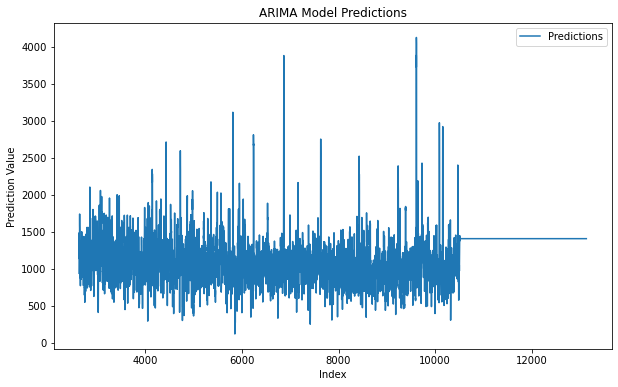

In [82]:
print(pred.loc[start])  # Access the element at the 'start' index
print(pred.loc[end])    # Access the element at the 'end' index

# Perform any further analysis or operations on 'pred'
# For example, calculating the mean of the predictions
mean_prediction = pred.mean()
print("Mean prediction:", mean_prediction)

# Plotting the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pred.index, pred.values, label='Predictions')
plt.xlabel('Index')
plt.ylabel('Prediction Value')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()